In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param2 import binary_params_peng

In [2]:
# import configuration
from HFC125_bmimBF4_PR import configuration

In [3]:
#need to make excel csv for 125
data = pd.read_csv('R125_bmimBF4.csv')
print(data)

    temperature  pressure  x_R125  x_bmimBF4
0         283.1      9900   0.013      0.987
1         283.2     99600   0.034      0.966
2         283.3    199600   0.075      0.925
3         283.2    299600   0.126      0.874
4         283.3    399600   0.185      0.815
5         283.1    499700   0.255      0.745
6         283.2    599700   0.342      0.658
7         283.1    699600   0.462      0.538
8         283.2    799800   0.660      0.340
9         298.2      9800   0.003      0.997
10        298.2     99600   0.023      0.977
11        298.2    199800   0.050      0.950
12        298.1    299500   0.080      0.920
13        298.2    399800   0.111      0.889
14        298.2    499500   0.143      0.857
15        298.2    599500   0.180      0.820
16        298.2    799600   0.261      0.739
17        298.1    999800   0.363      0.637
18        323.1     99600   0.013      0.987
19        323.1    199800   0.028      0.972
20        323.2    300000   0.042      0.958
21        

In [4]:
# from HFC32_emimTf2N_PR import configuration
binary_params_peng('R125_bmimBF4.csv', configuration, 'R125', 'bmimBF4', "x_R125", "x_bmimBF4", 
    init_temp =  298.2, init_press =   799600 , init_x_c1 =   0.261, init_x_c2 = 0.739,
    init_kappa_2_1 = 0.5, init_kappa_1_2 = 0.2, eps = 0.1, scaling_fac = 1e-9, read=True)

2021-03-30 18:12:20 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-30 18:12:20 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-30 18:12:20 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-30 18:12:20 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-30 18:12:21 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-30 18:12:21 [INFO] idaes.init.fs.state_

2021-03-30 18:12:26 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-30 18:12:26 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-30 18:12:27 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-30 18:12:27 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-30 18:12:27 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-30 18:12:27 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using st

  26  1.1866055e+01 1.69e-02 6.97e+01  -5.7 2.59e+03    -  1.00e+00 1.00e+00h  1
  27  1.1866063e+01 7.43e-04 3.21e+00  -5.7 3.74e+00  -5.0 1.00e+00 1.00e+00h  1
  28  1.1866054e+01 1.59e-06 1.37e-02  -5.7 1.06e+00  -5.4 1.00e+00 1.00e+00h  1
  29  1.1667799e+01 7.00e-03 6.40e-02  -5.7 3.36e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  1.1675950e+01 1.74e-04 8.66e-04  -5.7 1.18e+02    -  1.00e+00 1.00e+00h  1
  31  1.1675957e+01 8.62e-08 6.14e-06  -5.7 2.11e+00    -  1.00e+00 1.00e+00h  1
  32  1.1675957e+01 1.48e-12 3.24e-10  -8.6 1.60e-01    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 32

                                   (scaled)                 (unscaled)
Objective...............:   1.1675956560859090e+01    1.1675956560859090e+01
Dual infeasibility......:   3.2402122868865463e-10    3.2402122868865463e-10
Constraint violation....:   1.4779288903810084e-12    1.4779288903810084e-12
Complementarity....

In [11]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-03-30 18:17:47 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


In [12]:
def calc_outlet_xP(data,k21,k12,verbose=False):
    # create zeros arrays to be filled with x1 and P1
    R125_x = np.zeros((len(data)))
    P = np.zeros((len(data)))
    
    # model constraints
    m.fs.liq = Param(mutable=True,default=0.040)
    m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "bmimBF4"] == m.fs.liq)

    for i in range(len(data)):
        m.fs.liq = data["x_bmimBF4"].iloc[i]
        m.fs.F101.inlet.flow_mol.fix(1) 
        m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
        m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
        m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i])+0.1)
        m.fs.F101.inlet.mole_frac_comp[0,'bmimBF4'].fix(float(1-(data["x_R125"].iloc[i]+0.1)))
        m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
        m.fs.properties.PR_kappa['bmimBF4', 'R125'].fix(k21) # (-0.20093)
        m.fs.properties.PR_kappa['R125', 'bmimBF4'].fix(k12) # (-0.05619)

        if verbose:
            DOF_final = degrees_of_freedom(m)
            print("The final DOF is {0}".format(DOF_final))

        # solver
        m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
        solver = SolverFactory('ipopt')
        solver.options = {'tol': 1e-6}
        status = solver.solve(m, tee = False)
    #     m.fs.F101.report()
        if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
            R125_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R125']) 
            P[i] = value(m.fs.F101.vap_outlet.pressure[0])
        else:
            print('Infeasible.')
    return(R125_x,P)

In [13]:
k12= 0.11524746714128459
k21=  0.2919745027600006
R32_x,P= calc_outlet_xP(data,k21,k12, verbose=True)

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


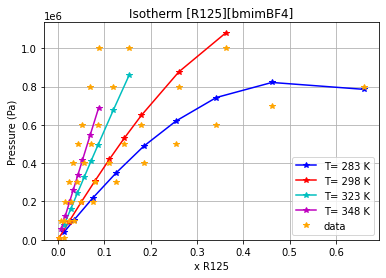

In [16]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R32_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R32_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R32_x[18:26],P[18:26],"c*-",label="T= 323 K") 
plt.plot(R32_x[26:],P[26:],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,)
plt.legend()
plt.show()